In [18]:
import pandas as pd

In [19]:
import datetime
from datetime import time as dt

In [20]:
import matplotlib.pyplot as plt

In [21]:
import seaborn as sns

In [22]:
import gc
gc.collect()

114

In [23]:
#mydatapath="yellow_tripdata_2018-01.csv"
#this function to read month's data
def data_aggregator(path,columnnumber,chunksize):
    df_list = []
    for chunk in pd.read_csv(path,usecols=columnnumber, chunksize=chunksize):
        df_list.append(pd.DataFrame(chunk).dropna())
    result = pd.concat(df_list)
    del df_list
    return result

In [24]:
import requests
from bs4 import BeautifulSoup
page = requests.get("https://github.com/CriMenghini/ADM-2018/blob/master/Homework_2/taxi_zone_lookup.csv")
soup = BeautifulSoup(page.content, 'html.parser')
ids=[]
bor=[]
zon=[]
srv_zon=[]
cell=0
for i in range(2,1327,5):    #FIRSTLY We get all the location ids
    a=soup.find_all('td')[i].get_text()  
    ids.append(a)
    cell=cell+1
    
cell=0
for i in range(3,1328,5):    #Then all the boroughs
    a=soup.find_all('td')[i].get_text()
    bor.append(a)
    cell=cell+1
    
cell=0
for i in range(4,1329,5):   #After that we get al zones
    a=soup.find_all('td')[i].get_text()
    zon.append(a)
    cell=cell+1
cell=0
for i in range(5,1330,5):    #Finally we get all the seving zones
    a=soup.find_all('td')[i].get_text()
    srv_zon.append(a)
    cell=cell+1
# after getting all the informations needed we merged all the lists together
data_tuples = list(zip(ids,bor,zon,srv_zon))

In [25]:
boroghFrame=pd.DataFrame(data_tuples,columns = ["PULocationID", "Borogh", "Zone", "srv_zon"])
boroghFrame['PULocationID']=boroghFrame['PULocationID'].apply(int)
boroghFrame=boroghFrame[boroghFrame.Borogh !='Unknown']
boroghFrame=boroghFrame[boroghFrame.Borogh !='EWR']
#this function to merge(join) two dataframes one of them the month's dataframe and second the borogh dataframe
def data_aggregator2(df1,df2,oncolumns,jointype):
    result = pd.merge(df1, boroghFrame, on=oncolumns,how=jointype)
    return result
#data_aggregator(df1,boroghFrame,['PULocationID'],"inner")

In [26]:
data_tuples=None
del data_tuples
ids=None
del ids
bor=None
del bor
zon=None
del zon
srv_zon=None
del srv_zon

In [27]:
gc.collect()

14344

In [28]:
#RQ1
JanData="yellow_tripdata_2018-01.csv"
FebData="yellow_tripdata_2018-02.csv"
MarData="yellow_tripdata_2018-03.csv"
AprData="yellow_tripdata_2018-04.csv"
MayData="yellow_tripdata_2018-05.csv"
JunData="yellow_tripdata_2018-06.csv"

In [30]:
#RQ4 For each month we will import it's data, we choose two columns PULocationID and Payment Type, then we will join this data
#with Borough data and group by payment type and borough, to get the count of each payment type in each borough.
#After getting the observed data we will plot the count of payment types in each borough and then calculate the chi square and p value. 
#MAY
MayDF=data_aggregator(MayData,[7,9],10000)
MayBoroghData=data_aggregator2(MayDF,boroghFrame,['PULocationID'],"inner")
JunDF=data_aggregator(JunData,[7,9],10000)
JunBoroghData=data_aggregator2(JunDF,boroghFrame,['PULocationID'],"inner")
JunDF=None
del JunDF

In [ ]:
AprDF=data_aggregator(AprData,[7,9],10000)
AprBoroghData=data_aggregator2(AprDF,boroghFrame,['PULocationID'],"inner")
AprDF=None
del AprDF

In [ ]:
MarDF=data_aggregator(MarData,[7,9],10000)
MarBoroghData=data_aggregator2(MarDF,boroghFrame,['PULocationID'],"inner")
MarDF=None
del MarDF

In [ ]:
FebDF=data_aggregator(FebData,[7,9],10000)
FebBoroghData=data_aggregator2(FebDF,boroghFrame,['PULocationID'],"inner")
FebDF=None
del FebDF

In [ ]:
JanDF=data_aggregator(JanData,[7,9],10000)
JanBoroghData=data_aggregator2(JanDF,boroghFrame,['PULocationID'],"inner")
JanDF=None
del JanDF

In [40]:
FullData=pd.concat([JanBoroghData,FebBoroghData,MarBoroghData,AprBoroghData,MayBoroghData,JunBoroghData])

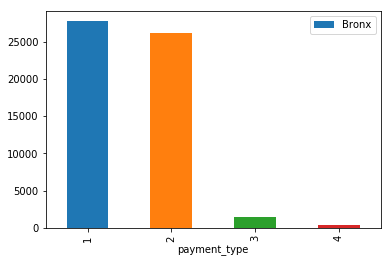

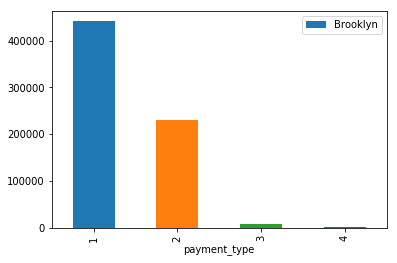

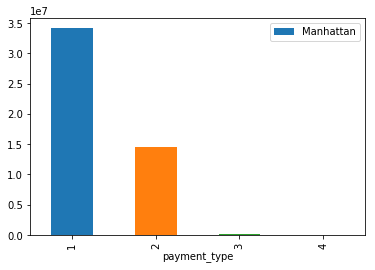

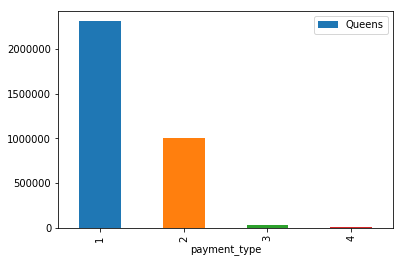

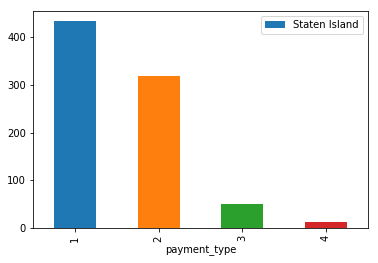

In [41]:
observed=FullData.groupby(['payment_type','Borogh']).size().unstack()
for i in range(observed.shape[1]):
    observed.iloc[:,i].plot(kind='bar')
    plt.legend(loc='upper right')
    plt.show()
    plt.close()

In [34]:
scs.chi2_contingency(observed)[0:2]

(61099.94992709283, 0.0)

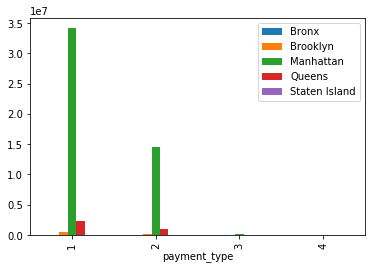

In [42]:
observed.plot(kind='bar')
plt.legend(loc='upper right')
plt.show()
plt.close()

In [ ]:
We supose that:
H0: Payemnet Type is not associated with Boroughs 
H1: Payemnet Type is associated with Boroughs 
And the null hypothesis is rejected, since p < 0.001, and a conclusion is made that payment type is associated with boroughs. 